In [15]:
from datasets import load_dataset, load_from_disk
import matplotlib.pyplot as plt
import numpy as np
import random

In [17]:
lm_datasets = load_from_disk(datasets_path)
print(lm_datasets)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'attention_mask'],
        num_rows: 87012
    })
})


In [98]:
train_dataset = lm_datasets["train"]
train_example = train_dataset[random.randint(0, len(train_dataset) - 1)]
for feature_name, data in train_example.items():
    print(feature_name, data.shape)
print(train_dataset[0])

input_ids torch.Size([600])
labels torch.Size([600])
attention_mask torch.Size([600])
{'input_ids': tensor([    1,  1128,  1784,  6923,   526,   297, 29871, 29955, 29889, 29947,
         6233, 29973,    13, 29955, 29889, 29947,  6233,   338,   278,  1021,
          408, 29871, 29955,  6233,   322, 29871, 29900, 29889, 29947,  6233,
        29889,    13,  7341, 29892,   322,  1951,   727,   526, 29871, 29953,
        29900,  6923,   297,   263, 11015, 29892,   769,   727,   526, 29871,
        29953, 29900,   334, 29871, 29955,   353, 29871, 29946, 29906, 29900,
         6923,   297, 29871, 29955,  6233, 29889,    13,  2855,  1951,   727,
          526, 29871, 29953, 29900,  6923,   297,   263, 11015, 29892,   769,
          727,   526, 29871, 29953, 29900,   334, 29871, 29900, 29889, 29947,
          353, 29871, 29946, 29947,  6923,   297, 29871, 29900, 29889, 29947,
         6233, 29889,    13,  6295, 29892,   297,  3001, 29892,   727,   526,
        29871, 29946, 29906, 29900,   718,

In [14]:
input_ids_list = lm_datasets["train"]["input_ids"]

In [ ]:
print(input_ids_list[0])
print(len(input_ids_list[0]))

tensor([    1,  1128,  1784,  6923,   526,   297, 29871, 29955, 29889, 29947,
         6233, 29973,    13, 29955, 29889, 29947,  6233,   338,   278,  1021,
          408, 29871, 29955,  6233,   322, 29871, 29900, 29889, 29947,  6233,
        29889,    13,  7341, 29892,   322,  1951,   727,   526, 29871, 29953,
        29900,  6923,   297,   263, 11015, 29892,   769,   727,   526, 29871,
        29953, 29900,   334, 29871, 29955,   353, 29871, 29946, 29906, 29900,
         6923,   297, 29871, 29955,  6233, 29889,    13,  2855,  1951,   727,
          526, 29871, 29953, 29900,  6923,   297,   263, 11015, 29892,   769,
          727,   526, 29871, 29953, 29900,   334, 29871, 29900, 29889, 29947,
          353, 29871, 29946, 29947,  6923,   297, 29871, 29900, 29889, 29947,
         6233, 29889,    13,  6295, 29892,   297,  3001, 29892,   727,   526,
        29871, 29946, 29906, 29900,   718, 29871, 29946, 29947,   353, 29871,
        29946, 29953, 29947,  6923,   297, 29871, 29955, 29889, 

In [ ]:
max_len_input_ids = max([len(input_ids) for input_ids in input_ids_list])
print("max_len_input_ids: ", max_len_input_ids)

max_len_input_ids:  3614


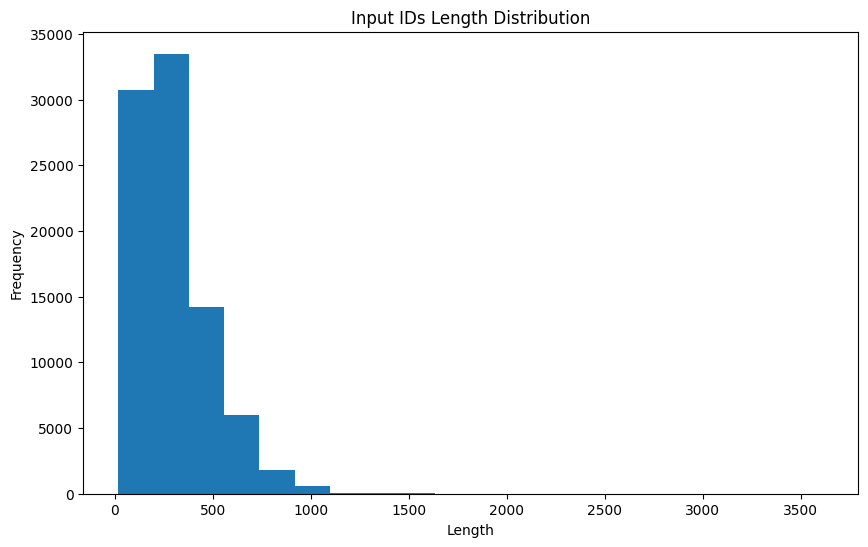

In [ ]:
input_ids_len_list = [len(input_ids) for input_ids in input_ids_list]
heights = np.array(input_ids_len_list)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(heights, bins=20)
ax.set_xlabel("Length")
ax.set_ylabel("Frequency")
ax.set_title("Input IDs Length Distribution")
plt.show()

In [ ]:
def count_above_upper_bound(len_list, upper_bound):
    count = len([length for length in input_ids_len_list if length > upper_bound])
    print(f"The number of input_ids with length greater than {upper_bound} is:", count)
    return count


count_above_upper_bound(input_ids_len_list, 1024)
count_above_upper_bound(input_ids_len_list, 1536)
count_above_upper_bound(input_ids_len_list, 2048)
count_above_upper_bound(input_ids_len_list, 4096)

The number of input_ids with length greater than 1024 is: 300
The number of input_ids with length greater than 1536 is: 21
The number of input_ids with length greater than 2048 is: 6
The number of input_ids with length greater than 4096 is: 0


0